## Q4.5 ##
### a) ###

> In images.internal.initSize (line 71)
  In imshow (line 309)


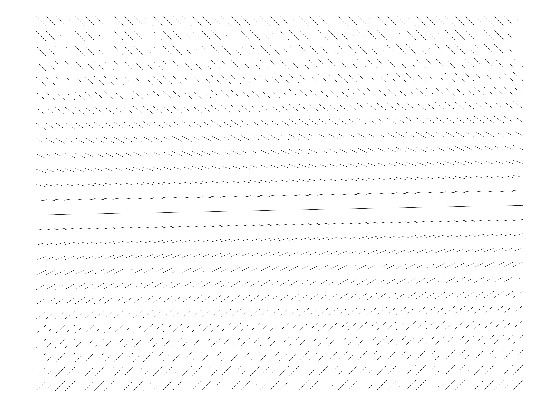

In [7]:
h = 50;
w = 50;
m = 1950;

A = zeros(m, h * w);
for i = 1:h
    for j = 1:w
        idx = (i - 1) * w + j;
        M = zeros(h, w);
        M(i, j) = 1;
        y = scanImage(M);
        A(:, idx) = y;
    end
end

imshow(-A, [])

### b) ###

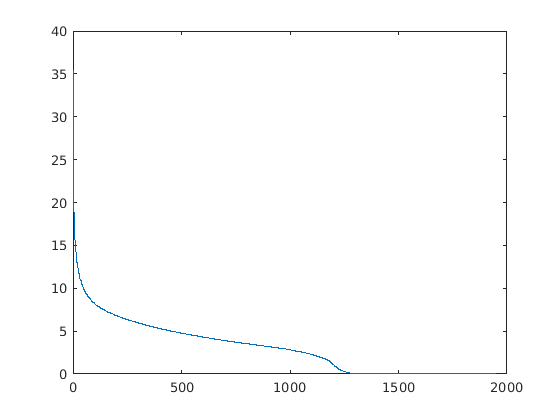

In [19]:
s = svd(A);
plot(s)

From the plot above a reasonable effective rank would be 1250. We can use the Moore-Penrose inverse with this effective rank.

For: 
$A = U \Sigma V^T$

We have:
$A^+ = V \Sigma^{-1} U^T $

and: 
$\tilde{x} = A^+y$

Where for $\Sigma^{-1}$ we have only 1250 non-zero entries.

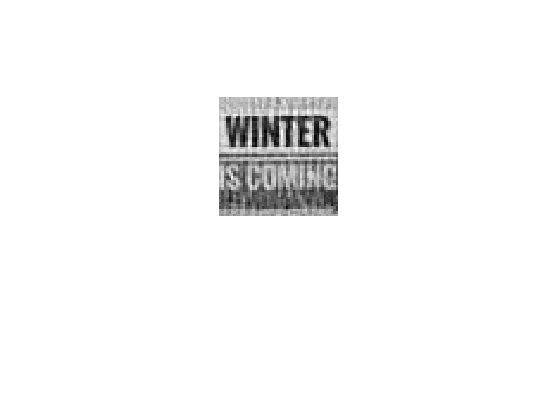

In [21]:
y = scanImage;
[U, S, V] = svd(A, 'econ');
erank = 1250;
U = U(:,1:erank);
V = V(:,1:erank);
S = S(1:erank,1:erank);
x_approx = V * inv(S) * transpose(U) * y;
M_approx = reshape(x_approx, h, w);
imshow(transpose(M_approx), [])

After transposing the message, it is clear that the hidden message is: "Winter is Coming".